# Product comparison

![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)


***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<br>

<br>


<div class="alert alert-block alert-success">
<h1><center> <u> Agulhas results </u> </center></h1>  
</div>    


<div class="alert alert-block alert-success"> 
 <h5><center> The notebook aims to evaluate the surface current for all products in the Agulhas region.</center></h5> 

## <u> Compared products </u> 

<h3>
    <ul>  
        <li> GlobCurrent Geostrophic REP </li> 
        <li> GlobCurrent Total REP </li>
        <li> WOC BFN-QG </li>
        <li> WOC inertial global </li>
    </ul>  

</h3>

In [1]:
from glob import glob
import numpy as np
import os
import sys 
sys.path.append('../')
import warnings
import datetime
warnings.filterwarnings("ignore")
sys.path.remove('/Users/sammymetref/Documents/DataChallenges/DC_IW_crossoverCal/2022a_mapping_HFdynamic')

In [2]:
import velocity_metrics.spectrum.spectrum as spectrum
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian 
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.fronts.compare_fronts_vel as compare_fronts_vel
import velocity_metrics.fronts.box_metrics as box_metrics

In [3]:
from src import utils

In [4]:

outputdir = '../results/'


<br>

<br>

## <u> 1. Spectrum </u> 

In [5]:
dir_spectrum = '../dc_data/results-woc/spectrum/'

name_plot = 'Spectrum_Agulhas.png'

<br>

<h2>At 0m</h2>

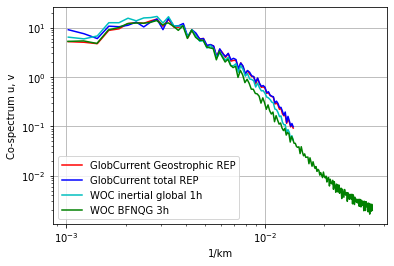

In [6]:
list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_T1_0.pyo',
                         dir_spectrum+'spectrum_015_004_region_T1_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul-glob-1h_region_T1_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-curgeo-bfn-3h_region_T1_0.pyo',]

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['r','b','c','g'])

<br>


<h2>At 15m</h2>

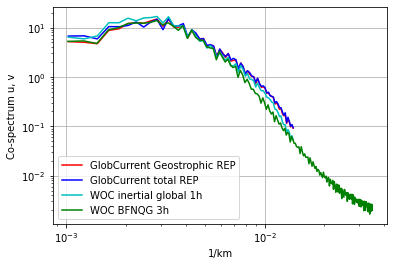

In [7]:
list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_T1_1.pyo',
                         dir_spectrum+'spectrum_015_004_region_T1_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul-glob-1h_region_T1_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-curgeo-bfn-3h_region_T1_1.pyo',]

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['r','b','c','g'])

<br>

<br>

## <u> 2. Eulerian RMS </u>

<br>

<h2>At 0m</h2>

<br>

<h3>Mean error</h3>

In [8]:
dir_eulerian = '../dc_data/results-woc/eulerian_analyse_pickle/'

In [9]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_008_047_00/Eulerian_RMS_mean_008_047.pyo','name':'GlobCurrents Geostrophic'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_00/Eulerian_RMS_mean_015_004.pyo','name':'GlobCurrents Total'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-curgeo-bfn-3h_00/Eulerian_RMS_mean_woc-l4-curgeo-bfn-3h.pyo','name':'BFN-QG'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-cureul-glob-1h_00/Eulerian_RMS_mean_woc-l4-cureul-glob-1h.pyo','name':'Global Inertial'}] 

utils.DictTable(list_dict)  

Mean,Eastward error,Northward error,Norm error,Direction error,Eastward speed,Northward speed,Field speed,Drifter speed,percentage
GlobCurrents Geostrophic,0.185,0.175,0.181,84.718,0.328,0.318,0.467,0.543,38.514
GlobCurrents Total,0.166,0.169,0.166,77.047,0.362,0.325,0.495,0.554,34.434
BFN-QG,0.179,0.180,0.183,95.679,0.335,0.323,0.467,0.542,40.735
Global Inertial,0.182,0.179,0.181,86.787,0.338,0.315,0.470,0.545,38.014


<br>

<br>

<h3>Standard deviation error</h3>

In [10]:

list_dict = [{'type_stat':'std','path':dir_eulerian+'eulerian_rms_T1_008_047_00/Eulerian_RMS_std_008_047.pyo','name':'GlobCurrents Geostrophic'},
             {'type_stat':'std','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_00/Eulerian_RMS_std_015_004.pyo','name':'GlobCurrents Total'},
             {'type_stat':'std','path':dir_eulerian+'eulerian_rms_T1_woc-l4-curgeo-bfn-3h_00/Eulerian_RMS_std_woc-l4-curgeo-bfn-3h.pyo','name':'BFN-QG'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-cureul-glob-1h_00/Eulerian_RMS_std_woc-l4-cureul-glob-1h.pyo','name':'Global Inertial'}] 

utils.DictTable(list_dict)  

std,Eastward error,Northward error,Norm error,Direction error,Eastward speed,Northward speed,Field speed,Drifter speed,percentage
GlobCurrents Geostrophic,0.117,0.112,0.118,64.674,0.326,0.317,0.290,0.298,0.212
GlobCurrents Total,0.109,0.110,0.110,60.797,0.355,0.325,0.288,0.299,0.192
BFN-QG,0.113,0.114,0.116,75.547,0.334,0.322,0.287,0.291,0.226
Global Inertial,0.117,0.116,0.119,67.338,0.334,0.315,0.278,0.291,0.208


<br>

<h2>At 15m</h2>

<br>

<h3>Mean error</h3>

In [11]:
dir_eulerian = '../dc_data/results-woc/eulerian_analyse_pickle/'

In [12]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_008_047_15/Eulerian_RMS_mean_008_047.pyo','name':'GlobCurrents Geostrophic'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_15/Eulerian_RMS_mean_015_004.pyo','name':'GlobCurrents Total'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-curgeo-bfn-3h_15/Eulerian_RMS_mean_woc-l4-curgeo-bfn-3h.pyo','name':'BFN-QG'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-cureul-glob-1h_15/Eulerian_RMS_mean_woc-l4-cureul-glob-1h.pyo','name':'Global Inertial'}] 

utils.DictTable(list_dict)  

Mean,Eastward error,Northward error,Norm error,Direction error,Eastward speed,Northward speed,Field speed,Drifter speed,percentage
GlobCurrents Geostrophic,0.195,0.193,0.205,81.975,0.426,0.382,0.585,0.674,35.201
GlobCurrents Total,0.198,0.195,0.209,80.823,0.432,0.389,0.595,0.679,34.423
BFN-QG,0.194,0.177,0.202,82.636,0.434,0.381,0.578,0.665,35.332
Global Inertial,0.217,0.220,0.225,86.463,0.445,0.396,0.607,0.684,36.111


<br>

<br>

<h3>Standard deviation error</h3>

In [13]:

list_dict = [{'type_stat':'std','path':dir_eulerian+'eulerian_rms_T1_008_047_15/Eulerian_RMS_std_008_047.pyo','name':'GlobCurrents Geostrophic'},
             {'type_stat':'std','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_15/Eulerian_RMS_std_015_004.pyo','name':'GlobCurrents Total'},
             {'type_stat':'std','path':dir_eulerian+'eulerian_rms_T1_woc-l4-curgeo-bfn-3h_15/Eulerian_RMS_std_woc-l4-curgeo-bfn-3h.pyo','name':'BFN-QG'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-cureul-glob-1h_15/Eulerian_RMS_std_woc-l4-cureul-glob-1h.pyo','name':'Global Inertial'}] 

utils.DictTable(list_dict)  

std,Eastward error,Northward error,Norm error,Direction error,Eastward speed,Northward speed,Field speed,Drifter speed,percentage
GlobCurrents Geostrophic,0.139,0.135,0.145,65.958,0.425,0.373,0.360,0.423,0.195
GlobCurrents Total,0.143,0.138,0.152,65.558,0.432,0.385,0.364,0.428,0.193
BFN-QG,0.140,0.122,0.144,68.513,0.433,0.372,0.355,0.423,0.199
Global Inertial,0.152,0.150,0.157,69.502,0.445,0.392,0.353,0.428,0.200


<br>

<br>

## <u> 3. Lagrangian Cumulative Distance</u> (at 15m)

In [14]:
dir_drifter = '../dc_data/drifter_pickle/'

dir_lcd = '../dc_data/results-woc/fictive_trajectories/'

drifter_list = [dir_drifter + 'Drifters_AOML_region_T1_15m_20190101T000000Z_20200101T000000Z.pyo']

all_path_artificial_drifters = [dir_lcd + 'woc_advection_T1_008_047_15m/data_type_008_047_region_T1.pyo',
                                dir_lcd + 'woc_advection_T1_015_004_15m/data_type_cmems_015_004_daily_region_T1.pyo',
                                dir_lcd + 'woc_advection_T1_woc-l4-curgeo-bfn-3h_15m/data_type_woc-l4-curgeo-bfn-3h_region_T1.pyo',
                                dir_lcd + 'woc_advection_T1_woc-l4-cureul-glob-1h_15m/data_type_woc-l4-cureul-glob-1h_region_T1_1.pyo']

all_outputfilename = ['SDE_region_T1_008_047_15m',
                      'SDE_region_T1_015_004_15m',
                      'SDE_region_T1_woc-l4-curgeo-bfn-3h_15m',
                      'SDE_region_T1_woc-l4-cureul-glob-1h_15m']

In [15]:


for path_artificial_drifters, outputfilename in zip(all_path_artificial_drifters, all_outputfilename):
    
    print(outputfilename)

    _ = sde.run(path_artificial_drifters, drifter_list, output_dir=outputdir, output_filename=outputfilename)


SDE_region_T1_008_047_15m


100%|██████████| 1617/1617 [00:15<00:00, 101.81it/s]


SDE_region_T1_015_004_15m


100%|██████████| 1617/1617 [00:14<00:00, 109.94it/s]


SDE_region_T1_woc-l4-curgeo-bfn-3h_15m


100%|██████████| 1617/1617 [00:14<00:00, 114.97it/s]


SDE_region_T1_woc-l4-cureul-glob-1h_15m


100%|██████████| 1624/1624 [00:13<00:00, 121.38it/s]


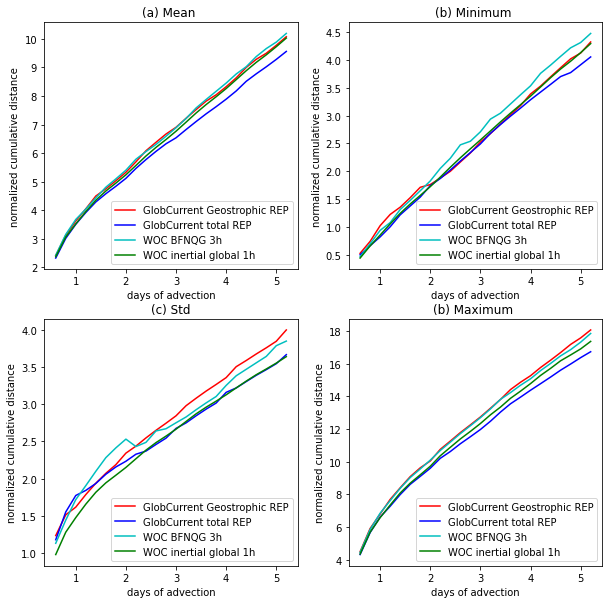

In [16]:
list_sde = [outputdir + output_filename + '.pyo' for output_filename in all_outputfilename]

outputfilename = 'SDE_region_T1_15m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['r','b','c','g'])

<br>

<br>

## <u>4. Fronts and currents consistency</u>

In [17]:
dir_fronts = '../dc_data/results-woc/fronts_vel_comparison/'

In [19]:

dic_list = box_metrics.run(dir_fronts+'config_fronts.json', 2, 
                first_date='20190101T000000Z',
                last_date ='20190115T000000Z',
                output_dir=outputdir, 
                plot=False)

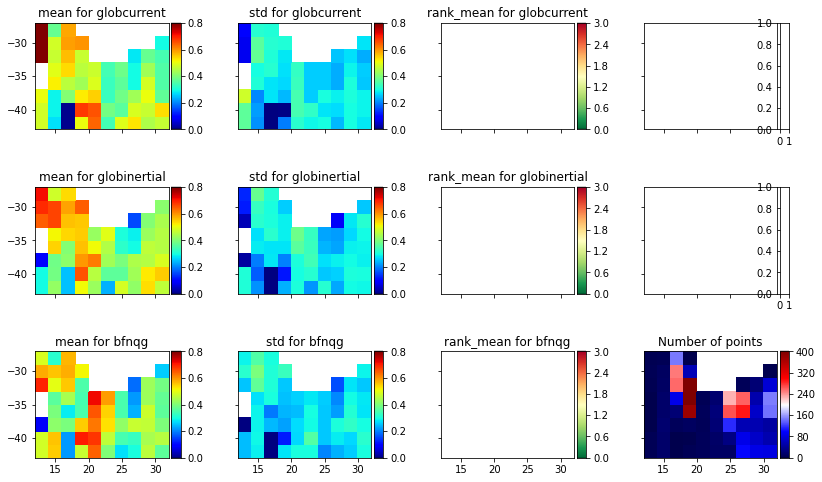

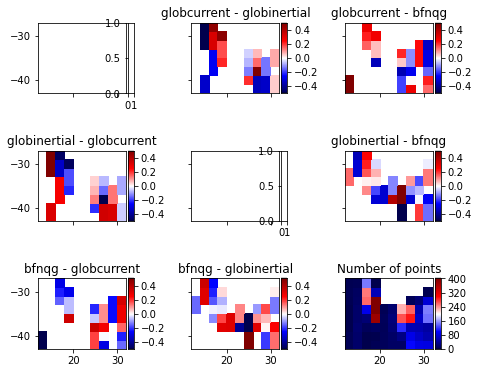

In [23]:
path = outputdir + 'globcurrent_globinertial_bfnqg_2019-01-01T00:00:00.000000Z_2019-01-15T00:00:00.000000Z_mean.nc'

dic_list = box_metrics.run_plot(path, 
                                dir_fronts+'config_fronts.json', 
                                size=2,
                                dir_out=outputdir)

In [31]:
# Save results as a markdown file

! jupyter nbconvert --output-dir='../results'  nb_overall_results-Agulhas.ipynb --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="['remove_cell', 'other_tag_to_remove']" --to markdown --no-input --no-prompt


[NbConvertApp] Converting notebook nb_overall_results-Agulhas.ipynb to markdown
[NbConvertApp] Support files will be in nb_overall_results-Agulhas_files/
[NbConvertApp] Making directory ../results/nb_overall_results-Agulhas_files
[NbConvertApp] Making directory ../results/nb_overall_results-Agulhas_files
[NbConvertApp] Making directory ../results/nb_overall_results-Agulhas_files
[NbConvertApp] Making directory ../results/nb_overall_results-Agulhas_files
[NbConvertApp] Writing 5105 bytes to ../results/nb_overall_results-Agulhas.md
